# Loading dataset

In [1]:
%plot inline

In [2]:
!cat ../data/winequality.names

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

In [3]:
!head ../data/winequality-red.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5
7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7
7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7


In [4]:
data = dlmread("../data/winequality-red.csv", ";" ,1, 0); % skip feature names
size(data)

ans =

   1599     12



# Preparing data

In [5]:
data_norm = [];
for j = 1:size(data,2),
    data_norm = [data_norm, (data(:,j)- mean(data(:,j))*ones(size(data,1),1))/std(data(:,j))];
end

In [6]:
cor = corr(data_norm)

cor =

 Columns 1 through 6:

   1.0000000  -0.2561309   0.6717034   0.1147767   0.0937052  -0.1537942
  -0.2561309   1.0000000  -0.5524957   0.0019179   0.0612978  -0.0105038
   0.6717034  -0.5524957   1.0000000   0.1435772   0.2038229  -0.0609781
   0.1147767   0.0019179   0.1435772   1.0000000   0.0556095   0.1870490
   0.0937052   0.0612978   0.2038229   0.0556095   1.0000000   0.0055621
  -0.1537942  -0.0105038  -0.0609781   0.1870490   0.0055621   1.0000000
  -0.1131814   0.0764700   0.0355330   0.2030279   0.0474005   0.6676665
   0.6680473   0.0220262   0.3649472   0.3552834   0.2006323  -0.0219458
  -0.6829782   0.2349373  -0.5419041  -0.0856524  -0.2650261   0.0703775
   0.1830057  -0.2609867   0.3127700   0.0055271   0.3712605   0.0516576
  -0.0616683  -0.2022880   0.1099032   0.0420754  -0.2211405  -0.0694084
   0.1240516  -0.3905578   0.2263725   0.0137316  -0.1289066  -0.0506561

 Columns 7 through 12:

  -0.1131814   0.6680473  -0.6829782   0.1830057  -0.0616683   0.1240

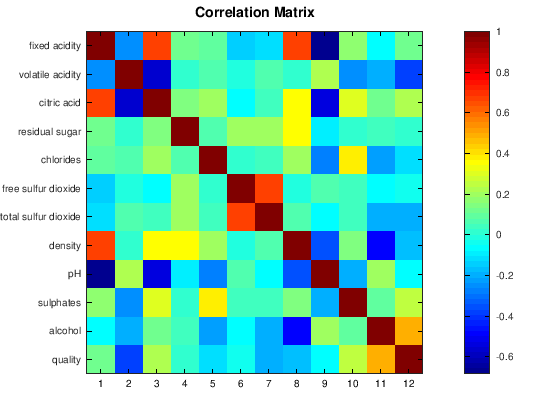

In [7]:
imagesc(cor);

set(gca, 'XTick', 1:size(cor,2)); % center x-axis ticks on bins
set(gca, 'YTick', 1:size(cor,2)); % center y-axis ticks on bins
set(gca, 'YTickLabel', ["fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"]); % set y-axis labels
title('Correlation Matrix', 'FontSize', 14); % set title

colormap('jet'); % set the colorscheme
colorbar; % enable colorbar

# Separating into training and testing set

In [8]:
X = data_norm(:,1:11); % inputs
y = data_norm(:, 12);  % labels

In [9]:
X_train = X(1:1119, :); % 70% for trainig
y_train = y(1:1119);

X_test = X(1120:1599, :);  % 30% for test
y_test = y(1120:1599);

# ANN Architecture

![Diagram](../Diagram.png)

In [10]:
% M number of labeled inputs
% N number of features (lenght of input vector)
[M, N] = size(X_train)

M =  1119
N =  11


In [11]:
O = 5 % number of neurons in the hidden layer

O =  5


In [12]:
% initial weights matrix as small random values
W = rand([O N]).*0.01; % W: OxN

In [13]:
% adding column for bias
X_train_bias = [ones(size(X_train,1),1), X_train]'; % X_tr_b: MxN+1
W_bias = [ones(size(W,1),1), W];

## ANN function:

Feedfoward output:


$ \mathbf{u} = \mathbf{Wx} $  
$ \mathbf{a} = f(\mathbf{u}) = \tanh(\mathbf{u})$  
$ y = \sum \mathbf{a}$

$$
    y = \sum \tanh{(\mathbf{Wx})}
$$

## Backpropagation


Gradient descent for minimizing error function J:

$$
\mathbf{W^{N+1}} = \mathbf{W^N} - \alpha \nabla{J} =  \mathbf{W^N} - \alpha \frac{\partial{J}}{\partial{\mathbf{W}}}
$$

Definig error function as squared error:

$$
J = e^2 = (s-y)^2
$$

Chain rule for finding gradient of J:

$$
\frac{\partial{J}}{\partial{\mathbf{W}}} = \frac{\partial{J}}{\partial{e}} \frac{\partial{e}}{\partial{y}} \frac{\partial{y}}{\partial{\mathbf{a}}} \frac{\partial{\mathbf{a}}}{\partial{\mathbf{u}}} \frac{\partial{\mathbf{u}}}{\partial{\mathbf{W}}} = 2 (s - y) (-1) (1) \mathbf{\dot{F}(u)} \mathbf{x} = \boldsymbol{\delta} \mathbf {x}
$$

Where the array $\mathbf{\dot{F}(u)}$ is defined as:

$$
\mathbf{\dot{F}(u)} = 
\begin{bmatrix}
  \dot{f}(u_1) & 0 & \cdots  & 0 \\
  0 & \dot{f}(u_2) & \cdots  & 0 \\
  \vdots   & \vdots & \ddots & \vdots \\
  0 & 0 & \cdots  & \dot{f}(u_O) \\
\end{bmatrix}
$$

and:

$\dot{f}(u) = \frac{d \tanh(u)}{du} = sech^2(u)$

Error metric:

$$
MSE = \frac{1}{M}\sum_M e^2 = \frac{1}{M}\sum_M (s - y)^2
$$

In [14]:
function Delta = get_delta(u, e),
    F_prime = zeros(size(u,2), size(u,2));
    for i = 1:size(u,2),
        for j = 1:size(u,2),
            if i==j,
                F_prime(i,j) = (sech(u(1)))^2; % F: OxO
            end
        end
    end
    
    Delta = -2*F_prime*e; % delta: OxO
    
end
                
                

In [15]:
function [W, MSE] = backprop_step(x, s, W, alpha),
    % one step of backpropagation (one input x)
    
    % W: NxO
    % x: 1xN
    N = size(x,1);
    
    % feedfoward
    u = x*W';      % u: 1xO
    a = tanh(u);   % output of hidden layer a: 1xO
    y = sum(a);    % y: 1x1
    
%    y = round(y);  % the problem use integers to classify the wine quality

    % backpropagation
    e = s - y;     % difference s: 1x1
    Delta = get_delta(u, e); % delta: OxO
    X = ones(size(Delta), 1)*x;  % X = OxN --- ???
    aux = Delta*X;             % aux: OxN !
                               % aux_ij = -2(s-y)f'(u_j)x_i        
    W = W - alpha.*aux; 

    % metric
    MSE = (e*e);
end

In [16]:
epsilon = 11;
mse_vec = [];
cum_mse = epsilon+1;
iter = 0;

In [17]:
% while cum_mse > epsilon,
%     cum_mse = 0;
%     for i=1:M,
%         [W_bias, mse] = backprop_step(X_train_bias(:,i)', y_train(i), W_bias, 0.00001);
%         cum_mse = cum_mse +  mse;
%     end
%     mse_vec = [mse_vec; cum_mse];
%     iter = iter + 1
%     cum_mse
% end

% iter
% MSE = cum_mse/M

In [18]:
% plot(mse_vec)

In [19]:
% W_bias

In [20]:
function [W, MSE] = backprop_batch_step(X, s, W, alpha),

    [M, N] = size(X);
    
    aux = zeros(size(W));
    E = [];
    
    for i = 1:M,
        % feedfoward
        u = X(:,i)'*W';      % u: 1xO
        a = tanh(u);   % output of hidden layer a: 1xO
        y = sum(a);    % y: 1x1

%        y = round(y);  % the problem use integers to classify the wine quality
        
        e = s(i) - y;
        
        E = [E; e];
        
        Delta = get_delta(u, e);
        Xv = ones(size(Delta), 1)*X(:,i)';
        aux = aux + Delta*Xv;  
    end

    aux = aux/M;
                              
    W = W - alpha.*aux; 

    % metric
    MSE = (E'*E)/M;
end

In [21]:
epsilon = 0.0001;
mse_vec = [];
mse = epsilon+1;
iter = 0;

In [22]:
while mse > epsilon,
    mse = 0;
    [W_bias, mse] = backprop_batch_step(X_train_bias, y_train, W_bias, 0.01);
    mse_vec = [mse_vec; mse];
    iter = iter + 1
    mse
end

iter =  1
mse =  17.437
iter =  2
mse =  15.668
iter =  3
mse =  13.517
iter =  4
mse =  11.077
iter =  5
mse =  8.6425
iter =  6
mse =  6.6005
iter =  7
mse =  5.1347
iter =  8
mse =  4.1328
iter =  9
mse =  3.4058
iter =  10
mse =  2.8399
iter =  11
mse =  2.3927
iter =  12
mse =  2.0492
iter =  13
mse =  1.7958
iter =  14
mse =  1.6140
iter =  15
mse =  1.4844
iter =  16
mse =  1.3904
iter =  17
mse =  1.3198
iter =  18
mse =  1.2640
iter =  19
mse =  1.2175
iter =  20
mse =  1.1767
iter =  21
mse =  1.1393
iter =  22
mse =  1.1040
iter =  23
mse =  1.0697
iter =  24
mse =  1.0360
iter =  25
mse =  1.0024
iter =  26
mse =  0.96872
iter =  27
mse =  0.93487
iter =  28
mse =  0.90076
iter =  29
mse =  0.86639
iter =  30
mse =  0.83179
iter =  31
mse =  0.79701
iter =  32
mse =  0.76213
iter =  33
mse =  0.72725
iter =  34
mse =  0.69248
iter =  35
mse =  0.65797
iter =  36
mse =  0.62385
iter =  37
mse =  0.59027
iter =  38
mse =  0.55739
iter =  39
mse =  0.52536
iter =  40
mse =  0.

mse =  0.061976
iter =  303
mse =  0.061841
iter =  304
mse =  0.061706
iter =  305
mse =  0.061572
iter =  306
mse =  0.061439
iter =  307
mse =  0.061306
iter =  308
mse =  0.061173
iter =  309
mse =  0.061040
iter =  310
mse =  0.060908
iter =  311
mse =  0.060777
iter =  312
mse =  0.060645
iter =  313
mse =  0.060514
iter =  314
mse =  0.060384
iter =  315
mse =  0.060254
iter =  316
mse =  0.060124
iter =  317
mse =  0.059994
iter =  318
mse =  0.059865
iter =  319
mse =  0.059737
iter =  320
mse =  0.059608
iter =  321
mse =  0.059480
iter =  322
mse =  0.059353
iter =  323
mse =  0.059225
iter =  324
mse =  0.059099
iter =  325
mse =  0.058972
iter =  326
mse =  0.058846
iter =  327
mse =  0.058720
iter =  328
mse =  0.058595
iter =  329
mse =  0.058469
iter =  330
mse =  0.058345
iter =  331
mse =  0.058220
iter =  332
mse =  0.058096
iter =  333
mse =  0.057972
iter =  334
mse =  0.057849
iter =  335
mse =  0.057726
iter =  336
mse =  0.057603
iter =  337
mse =  0.057481
iter

mse =  0.034184
iter =  596
mse =  0.034118
iter =  597
mse =  0.034052
iter =  598
mse =  0.033986
iter =  599
mse =  0.033921
iter =  600
mse =  0.033855
iter =  601
mse =  0.033790
iter =  602
mse =  0.033725
iter =  603
mse =  0.033660
iter =  604
mse =  0.033595
iter =  605
mse =  0.033530
iter =  606
mse =  0.033466
iter =  607
mse =  0.033401
iter =  608
mse =  0.033337
iter =  609
mse =  0.033273
iter =  610
mse =  0.033208
iter =  611
mse =  0.033145
iter =  612
mse =  0.033081
iter =  613
mse =  0.033017
iter =  614
mse =  0.032954
iter =  615
mse =  0.032890
iter =  616
mse =  0.032827
iter =  617
mse =  0.032764
iter =  618
mse =  0.032701
iter =  619
mse =  0.032638
iter =  620
mse =  0.032576
iter =  621
mse =  0.032513
iter =  622
mse =  0.032451
iter =  623
mse =  0.032388
iter =  624
mse =  0.032326
iter =  625
mse =  0.032264
iter =  626
mse =  0.032202
iter =  627
mse =  0.032141
iter =  628
mse =  0.032079
iter =  629
mse =  0.032018
iter =  630
mse =  0.031956
iter

mse =  0.019758
iter =  889
mse =  0.019722
iter =  890
mse =  0.019686
iter =  891
mse =  0.019651
iter =  892
mse =  0.019615
iter =  893
mse =  0.019580
iter =  894
mse =  0.019544
iter =  895
mse =  0.019509
iter =  896
mse =  0.019473
iter =  897
mse =  0.019438
iter =  898
mse =  0.019403
iter =  899
mse =  0.019368
iter =  900
mse =  0.019333
iter =  901
mse =  0.019298
iter =  902
mse =  0.019263
iter =  903
mse =  0.019228
iter =  904
mse =  0.019194
iter =  905
mse =  0.019159
iter =  906
mse =  0.019124
iter =  907
mse =  0.019090
iter =  908
mse =  0.019055
iter =  909
mse =  0.019021
iter =  910
mse =  0.018987
iter =  911
mse =  0.018952
iter =  912
mse =  0.018918
iter =  913
mse =  0.018884
iter =  914
mse =  0.018850
iter =  915
mse =  0.018816
iter =  916
mse =  0.018782
iter =  917
mse =  0.018748
iter =  918
mse =  0.018714
iter =  919
mse =  0.018681
iter =  920
mse =  0.018647
iter =  921
mse =  0.018613
iter =  922
mse =  0.018580
iter =  923
mse =  0.018546
iter

iter =  1175
mse =  0.011902
iter =  1176
mse =  0.011882
iter =  1177
mse =  0.011861
iter =  1178
mse =  0.011841
iter =  1179
mse =  0.011821
iter =  1180
mse =  0.011800
iter =  1181
mse =  0.011780
iter =  1182
mse =  0.011760
iter =  1183
mse =  0.011740
iter =  1184
mse =  0.011720
iter =  1185
mse =  0.011699
iter =  1186
mse =  0.011679
iter =  1187
mse =  0.011659
iter =  1188
mse =  0.011639
iter =  1189
mse =  0.011619
iter =  1190
mse =  0.011599
iter =  1191
mse =  0.011580
iter =  1192
mse =  0.011560
iter =  1193
mse =  0.011540
iter =  1194
mse =  0.011520
iter =  1195
mse =  0.011500
iter =  1196
mse =  0.011481
iter =  1197
mse =  0.011461
iter =  1198
mse =  0.011442
iter =  1199
mse =  0.011422
iter =  1200
mse =  0.011402
iter =  1201
mse =  0.011383
iter =  1202
mse =  0.011363
iter =  1203
mse =  0.011344
iter =  1204
mse =  0.011325
iter =  1205
mse =  0.011305
iter =  1206
mse =  0.011286
iter =  1207
mse =  0.011267
iter =  1208
mse =  0.011247
iter =  1209
m

iter =  1452
mse =  0.0074766
iter =  1453
mse =  0.0074644
iter =  1454
mse =  0.0074522
iter =  1455
mse =  0.0074400
iter =  1456
mse =  0.0074278
iter =  1457
mse =  0.0074157
iter =  1458
mse =  0.0074036
iter =  1459
mse =  0.0073915
iter =  1460
mse =  0.0073794
iter =  1461
mse =  0.0073673
iter =  1462
mse =  0.0073553
iter =  1463
mse =  0.0073433
iter =  1464
mse =  0.0073313
iter =  1465
mse =  0.0073193
iter =  1466
mse =  0.0073074
iter =  1467
mse =  0.0072955
iter =  1468
mse =  0.0072836
iter =  1469
mse =  0.0072717
iter =  1470
mse =  0.0072598
iter =  1471
mse =  0.0072480
iter =  1472
mse =  0.0072362
iter =  1473
mse =  0.0072244
iter =  1474
mse =  0.0072126
iter =  1475
mse =  0.0072009
iter =  1476
mse =  0.0071891
iter =  1477
mse =  0.0071774
iter =  1478
mse =  0.0071657
iter =  1479
mse =  0.0071541
iter =  1480
mse =  0.0071424
iter =  1481
mse =  0.0071308
iter =  1482
mse =  0.0071192
iter =  1483
mse =  0.0071076
iter =  1484
mse =  0.0070960
iter =  14

mse =  0.0048353
iter =  1726
mse =  0.0048278
iter =  1727
mse =  0.0048203
iter =  1728
mse =  0.0048128
iter =  1729
mse =  0.0048054
iter =  1730
mse =  0.0047979
iter =  1731
mse =  0.0047905
iter =  1732
mse =  0.0047830
iter =  1733
mse =  0.0047756
iter =  1734
mse =  0.0047682
iter =  1735
mse =  0.0047608
iter =  1736
mse =  0.0047534
iter =  1737
mse =  0.0047461
iter =  1738
mse =  0.0047387
iter =  1739
mse =  0.0047314
iter =  1740
mse =  0.0047241
iter =  1741
mse =  0.0047167
iter =  1742
mse =  0.0047094
iter =  1743
mse =  0.0047021
iter =  1744
mse =  0.0046949
iter =  1745
mse =  0.0046876
iter =  1746
mse =  0.0046804
iter =  1747
mse =  0.0046731
iter =  1748
mse =  0.0046659
iter =  1749
mse =  0.0046587
iter =  1750
mse =  0.0046515
iter =  1751
mse =  0.0046443
iter =  1752
mse =  0.0046371
iter =  1753
mse =  0.0046300
iter =  1754
mse =  0.0046228
iter =  1755
mse =  0.0046157
iter =  1756
mse =  0.0046085
iter =  1757
mse =  0.0046014
iter =  1758
mse =  0.0

iter =  1999
mse =  0.0031972
iter =  2000
mse =  0.0031925
iter =  2001
mse =  0.0031878
iter =  2002
mse =  0.0031832
iter =  2003
mse =  0.0031785
iter =  2004
mse =  0.0031739
iter =  2005
mse =  0.0031693
iter =  2006
mse =  0.0031646
iter =  2007
mse =  0.0031600
iter =  2008
mse =  0.0031554
iter =  2009
mse =  0.0031508
iter =  2010
mse =  0.0031462
iter =  2011
mse =  0.0031416
iter =  2012
mse =  0.0031370
iter =  2013
mse =  0.0031325
iter =  2014
mse =  0.0031279
iter =  2015
mse =  0.0031233
iter =  2016
mse =  0.0031188
iter =  2017
mse =  0.0031143
iter =  2018
mse =  0.0031097
iter =  2019
mse =  0.0031052
iter =  2020
mse =  0.0031007
iter =  2021
mse =  0.0030962
iter =  2022
mse =  0.0030917
iter =  2023
mse =  0.0030872
iter =  2024
mse =  0.0030827
iter =  2025
mse =  0.0030782
iter =  2026
mse =  0.0030737
iter =  2027
mse =  0.0030693
iter =  2028
mse =  0.0030648
iter =  2029
mse =  0.0030604
iter =  2030
mse =  0.0030559
iter =  2031
mse =  0.0030515
iter =  20

mse =  0.0021741
iter =  2273
mse =  0.0021712
iter =  2274
mse =  0.0021682
iter =  2275
mse =  0.0021653
iter =  2276
mse =  0.0021623
iter =  2277
mse =  0.0021594
iter =  2278
mse =  0.0021565
iter =  2279
mse =  0.0021536
iter =  2280
mse =  0.0021506
iter =  2281
mse =  0.0021477
iter =  2282
mse =  0.0021448
iter =  2283
mse =  0.0021419
iter =  2284
mse =  0.0021390
iter =  2285
mse =  0.0021361
iter =  2286
mse =  0.0021332
iter =  2287
mse =  0.0021303
iter =  2288
mse =  0.0021275
iter =  2289
mse =  0.0021246
iter =  2290
mse =  0.0021217
iter =  2291
mse =  0.0021188
iter =  2292
mse =  0.0021160
iter =  2293
mse =  0.0021131
iter =  2294
mse =  0.0021103
iter =  2295
mse =  0.0021074
iter =  2296
mse =  0.0021046
iter =  2297
mse =  0.0021017
iter =  2298
mse =  0.0020989
iter =  2299
mse =  0.0020961
iter =  2300
mse =  0.0020932
iter =  2301
mse =  0.0020904
iter =  2302
mse =  0.0020876
iter =  2303
mse =  0.0020848
iter =  2304
mse =  0.0020820
iter =  2305
mse =  0.0

iter =  2546
mse =  0.0015215
iter =  2547
mse =  0.0015196
iter =  2548
mse =  0.0015177
iter =  2549
mse =  0.0015158
iter =  2550
mse =  0.0015140
iter =  2551
mse =  0.0015121
iter =  2552
mse =  0.0015102
iter =  2553
mse =  0.0015083
iter =  2554
mse =  0.0015065
iter =  2555
mse =  0.0015046
iter =  2556
mse =  0.0015027
iter =  2557
mse =  0.0015009
iter =  2558
mse =  0.0014990
iter =  2559
mse =  0.0014972
iter =  2560
mse =  0.0014953
iter =  2561
mse =  0.0014935
iter =  2562
mse =  0.0014916
iter =  2563
mse =  0.0014898
iter =  2564
mse =  0.0014879
iter =  2565
mse =  0.0014861
iter =  2566
mse =  0.0014843
iter =  2567
mse =  0.0014824
iter =  2568
mse =  0.0014806
iter =  2569
mse =  0.0014788
iter =  2570
mse =  0.0014769
iter =  2571
mse =  0.0014751
iter =  2572
mse =  0.0014733
iter =  2573
mse =  0.0014715
iter =  2574
mse =  0.0014697
iter =  2575
mse =  0.0014679
iter =  2576
mse =  0.0014661
iter =  2577
mse =  0.0014643
iter =  2578
mse =  0.0014625
iter =  25

mse =  0.0011020
iter =  2820
mse =  0.0011008
iter =  2821
mse =  0.0010995
iter =  2822
mse =  0.0010983
iter =  2823
mse =  0.0010971
iter =  2824
mse =  0.0010958
iter =  2825
mse =  0.0010946
iter =  2826
mse =  0.0010934
iter =  2827
mse =  0.0010922
iter =  2828
mse =  0.0010910
iter =  2829
mse =  0.0010898
iter =  2830
mse =  0.0010885
iter =  2831
mse =  0.0010873
iter =  2832
mse =  0.0010861
iter =  2833
mse =  0.0010849
iter =  2834
mse =  0.0010837
iter =  2835
mse =  0.0010825
iter =  2836
mse =  0.0010813
iter =  2837
mse =  0.0010801
iter =  2838
mse =  0.0010789
iter =  2839
mse =  0.0010777
iter =  2840
mse =  0.0010765
iter =  2841
mse =  0.0010753
iter =  2842
mse =  0.0010741
iter =  2843
mse =  0.0010729
iter =  2844
mse =  0.0010718
iter =  2845
mse =  0.0010706
iter =  2846
mse =  0.0010694
iter =  2847
mse =  0.0010682
iter =  2848
mse =  0.0010670
iter =  2849
mse =  0.0010658
iter =  2850
mse =  0.0010647
iter =  2851
mse =  0.0010635
iter =  2852
mse =  0.0

iter =  3087
mse =  0.00083039
iter =  3088
mse =  0.00082956
iter =  3089
mse =  0.00082874
iter =  3090
mse =  0.00082792
iter =  3091
mse =  0.00082710
iter =  3092
mse =  0.00082628
iter =  3093
mse =  0.00082546
iter =  3094
mse =  0.00082464
iter =  3095
mse =  0.00082383
iter =  3096
mse =  0.00082301
iter =  3097
mse =  0.00082220
iter =  3098
mse =  0.00082139
iter =  3099
mse =  0.00082057
iter =  3100
mse =  0.00081976
iter =  3101
mse =  0.00081896
iter =  3102
mse =  0.00081815
iter =  3103
mse =  0.00081734
iter =  3104
mse =  0.00081654
iter =  3105
mse =  0.00081573
iter =  3106
mse =  0.00081493
iter =  3107
mse =  0.00081413
iter =  3108
mse =  0.00081333
iter =  3109
mse =  0.00081253
iter =  3110
mse =  0.00081173
iter =  3111
mse =  0.00081093
iter =  3112
mse =  0.00081014
iter =  3113
mse =  0.00080934
iter =  3114
mse =  0.00080855
iter =  3115
mse =  0.00080775
iter =  3116
mse =  0.00080696
iter =  3117
mse =  0.00080617
iter =  3118
mse =  0.00080538
iter =  

mse =  0.00064904
iter =  3352
mse =  0.00064847
iter =  3353
mse =  0.00064790
iter =  3354
mse =  0.00064734
iter =  3355
mse =  0.00064677
iter =  3356
mse =  0.00064621
iter =  3357
mse =  0.00064564
iter =  3358
mse =  0.00064508
iter =  3359
mse =  0.00064452
iter =  3360
mse =  0.00064396
iter =  3361
mse =  0.00064340
iter =  3362
mse =  0.00064284
iter =  3363
mse =  0.00064228
iter =  3364
mse =  0.00064172
iter =  3365
mse =  0.00064116
iter =  3366
mse =  0.00064061
iter =  3367
mse =  0.00064005
iter =  3368
mse =  0.00063950
iter =  3369
mse =  0.00063894
iter =  3370
mse =  0.00063839
iter =  3371
mse =  0.00063784
iter =  3372
mse =  0.00063728
iter =  3373
mse =  0.00063673
iter =  3374
mse =  0.00063618
iter =  3375
mse =  0.00063563
iter =  3376
mse =  0.00063508
iter =  3377
mse =  0.00063454
iter =  3378
mse =  0.00063399
iter =  3379
mse =  0.00063344
iter =  3380
mse =  0.00063289
iter =  3381
mse =  0.00063235
iter =  3382
mse =  0.00063180
iter =  3383
mse =  0

iter =  3616
mse =  0.00052234
iter =  3617
mse =  0.00052194
iter =  3618
mse =  0.00052154
iter =  3619
mse =  0.00052114
iter =  3620
mse =  0.00052074
iter =  3621
mse =  0.00052034
iter =  3622
mse =  0.00051995
iter =  3623
mse =  0.00051955
iter =  3624
mse =  0.00051915
iter =  3625
mse =  0.00051876
iter =  3626
mse =  0.00051836
iter =  3627
mse =  0.00051797
iter =  3628
mse =  0.00051757
iter =  3629
mse =  0.00051718
iter =  3630
mse =  0.00051678
iter =  3631
mse =  0.00051639
iter =  3632
mse =  0.00051600
iter =  3633
mse =  0.00051560
iter =  3634
mse =  0.00051521
iter =  3635
mse =  0.00051482
iter =  3636
mse =  0.00051443
iter =  3637
mse =  0.00051404
iter =  3638
mse =  0.00051365
iter =  3639
mse =  0.00051326
iter =  3640
mse =  0.00051287
iter =  3641
mse =  0.00051248
iter =  3642
mse =  0.00051210
iter =  3643
mse =  0.00051171
iter =  3644
mse =  0.00051132
iter =  3645
mse =  0.00051094
iter =  3646
mse =  0.00051055
iter =  3647
mse =  0.00051016
iter =  

mse =  0.00043203
iter =  3881
mse =  0.00043174
iter =  3882
mse =  0.00043145
iter =  3883
mse =  0.00043116
iter =  3884
mse =  0.00043087
iter =  3885
mse =  0.00043058
iter =  3886
mse =  0.00043029
iter =  3887
mse =  0.00043000
iter =  3888
mse =  0.00042971
iter =  3889
mse =  0.00042942
iter =  3890
mse =  0.00042914
iter =  3891
mse =  0.00042885
iter =  3892
mse =  0.00042856
iter =  3893
mse =  0.00042827
iter =  3894
mse =  0.00042799
iter =  3895
mse =  0.00042770
iter =  3896
mse =  0.00042741
iter =  3897
mse =  0.00042713
iter =  3898
mse =  0.00042684
iter =  3899
mse =  0.00042656
iter =  3900
mse =  0.00042627
iter =  3901
mse =  0.00042599
iter =  3902
mse =  0.00042570
iter =  3903
mse =  0.00042542
iter =  3904
mse =  0.00042514
iter =  3905
mse =  0.00042485
iter =  3906
mse =  0.00042457
iter =  3907
mse =  0.00042429
iter =  3908
mse =  0.00042401
iter =  3909
mse =  0.00042372
iter =  3910
mse =  0.00042344
iter =  3911
mse =  0.00042316
iter =  3912
mse =  0

iter =  4145
mse =  0.00036515
iter =  4146
mse =  0.00036493
iter =  4147
mse =  0.00036471
iter =  4148
mse =  0.00036449
iter =  4149
mse =  0.00036428
iter =  4150
mse =  0.00036406
iter =  4151
mse =  0.00036384
iter =  4152
mse =  0.00036362
iter =  4153
mse =  0.00036341
iter =  4154
mse =  0.00036319
iter =  4155
mse =  0.00036297
iter =  4156
mse =  0.00036276
iter =  4157
mse =  0.00036254
iter =  4158
mse =  0.00036233
iter =  4159
mse =  0.00036211
iter =  4160
mse =  0.00036190
iter =  4161
mse =  0.00036168
iter =  4162
mse =  0.00036147
iter =  4163
mse =  0.00036125
iter =  4164
mse =  0.00036104
iter =  4165
mse =  0.00036082
iter =  4166
mse =  0.00036061
iter =  4167
mse =  0.00036040
iter =  4168
mse =  0.00036018
iter =  4169
mse =  0.00035997
iter =  4170
mse =  0.00035976
iter =  4171
mse =  0.00035954
iter =  4172
mse =  0.00035933
iter =  4173
mse =  0.00035912
iter =  4174
mse =  0.00035891
iter =  4175
mse =  0.00035869
iter =  4176
mse =  0.00035848
iter =  

mse =  0.00031439
iter =  4410
mse =  0.00031422
iter =  4411
mse =  0.00031405
iter =  4412
mse =  0.00031388
iter =  4413
mse =  0.00031371
iter =  4414
mse =  0.00031354
iter =  4415
mse =  0.00031337
iter =  4416
mse =  0.00031321
iter =  4417
mse =  0.00031304
iter =  4418
mse =  0.00031287
iter =  4419
mse =  0.00031270
iter =  4420
mse =  0.00031253
iter =  4421
mse =  0.00031237
iter =  4422
mse =  0.00031220
iter =  4423
mse =  0.00031203
iter =  4424
mse =  0.00031186
iter =  4425
mse =  0.00031170
iter =  4426
mse =  0.00031153
iter =  4427
mse =  0.00031136
iter =  4428
mse =  0.00031120
iter =  4429
mse =  0.00031103
iter =  4430
mse =  0.00031087
iter =  4431
mse =  0.00031070
iter =  4432
mse =  0.00031053
iter =  4433
mse =  0.00031037
iter =  4434
mse =  0.00031020
iter =  4435
mse =  0.00031004
iter =  4436
mse =  0.00030987
iter =  4437
mse =  0.00030971
iter =  4438
mse =  0.00030954
iter =  4439
mse =  0.00030938
iter =  4440
mse =  0.00030921
iter =  4441
mse =  0

iter =  4674
mse =  0.00027432
iter =  4675
mse =  0.00027419
iter =  4676
mse =  0.00027405
iter =  4677
mse =  0.00027392
iter =  4678
mse =  0.00027378
iter =  4679
mse =  0.00027365
iter =  4680
mse =  0.00027351
iter =  4681
mse =  0.00027338
iter =  4682
mse =  0.00027324
iter =  4683
mse =  0.00027311
iter =  4684
mse =  0.00027298
iter =  4685
mse =  0.00027284
iter =  4686
mse =  0.00027271
iter =  4687
mse =  0.00027257
iter =  4688
mse =  0.00027244
iter =  4689
mse =  0.00027231
iter =  4690
mse =  0.00027217
iter =  4691
mse =  0.00027204
iter =  4692
mse =  0.00027191
iter =  4693
mse =  0.00027177
iter =  4694
mse =  0.00027164
iter =  4695
mse =  0.00027151
iter =  4696
mse =  0.00027138
iter =  4697
mse =  0.00027124
iter =  4698
mse =  0.00027111
iter =  4699
mse =  0.00027098
iter =  4700
mse =  0.00027084
iter =  4701
mse =  0.00027071
iter =  4702
mse =  0.00027058
iter =  4703
mse =  0.00027045
iter =  4704
mse =  0.00027032
iter =  4705
mse =  0.00027018
iter =  

mse =  0.00024201
iter =  4939
mse =  0.00024190
iter =  4940
mse =  0.00024179
iter =  4941
mse =  0.00024168
iter =  4942
mse =  0.00024156
iter =  4943
mse =  0.00024145
iter =  4944
mse =  0.00024134
iter =  4945
mse =  0.00024123
iter =  4946
mse =  0.00024112
iter =  4947
mse =  0.00024101
iter =  4948
mse =  0.00024090
iter =  4949
mse =  0.00024079
iter =  4950
mse =  0.00024068
iter =  4951
mse =  0.00024057
iter =  4952
mse =  0.00024046
iter =  4953
mse =  0.00024035
iter =  4954
mse =  0.00024024
iter =  4955
mse =  0.00024013
iter =  4956
mse =  0.00024002
iter =  4957
mse =  0.00023991
iter =  4958
mse =  0.00023980
iter =  4959
mse =  0.00023969
iter =  4960
mse =  0.00023959
iter =  4961
mse =  0.00023948
iter =  4962
mse =  0.00023937
iter =  4963
mse =  0.00023926
iter =  4964
mse =  0.00023915
iter =  4965
mse =  0.00023904
iter =  4966
mse =  0.00023893
iter =  4967
mse =  0.00023882
iter =  4968
mse =  0.00023871
iter =  4969
mse =  0.00023860
iter =  4970
mse =  0

iter =  5203
mse =  0.00021506
iter =  5204
mse =  0.00021497
iter =  5205
mse =  0.00021488
iter =  5206
mse =  0.00021478
iter =  5207
mse =  0.00021469
iter =  5208
mse =  0.00021460
iter =  5209
mse =  0.00021450
iter =  5210
mse =  0.00021441
iter =  5211
mse =  0.00021432
iter =  5212
mse =  0.00021423
iter =  5213
mse =  0.00021413
iter =  5214
mse =  0.00021404
iter =  5215
mse =  0.00021395
iter =  5216
mse =  0.00021386
iter =  5217
mse =  0.00021376
iter =  5218
mse =  0.00021367
iter =  5219
mse =  0.00021358
iter =  5220
mse =  0.00021349
iter =  5221
mse =  0.00021339
iter =  5222
mse =  0.00021330
iter =  5223
mse =  0.00021321
iter =  5224
mse =  0.00021312
iter =  5225
mse =  0.00021303
iter =  5226
mse =  0.00021293
iter =  5227
mse =  0.00021284
iter =  5228
mse =  0.00021275
iter =  5229
mse =  0.00021266
iter =  5230
mse =  0.00021257
iter =  5231
mse =  0.00021247
iter =  5232
mse =  0.00021238
iter =  5233
mse =  0.00021229
iter =  5234
mse =  0.00021220
iter =  

mse =  0.00019228
iter =  5468
mse =  0.00019220
iter =  5469
mse =  0.00019212
iter =  5470
mse =  0.00019204
iter =  5471
mse =  0.00019196
iter =  5472
mse =  0.00019188
iter =  5473
mse =  0.00019181
iter =  5474
mse =  0.00019173
iter =  5475
mse =  0.00019165
iter =  5476
mse =  0.00019157
iter =  5477
mse =  0.00019149
iter =  5478
mse =  0.00019141
iter =  5479
mse =  0.00019133
iter =  5480
mse =  0.00019125
iter =  5481
mse =  0.00019117
iter =  5482
mse =  0.00019109
iter =  5483
mse =  0.00019101
iter =  5484
mse =  0.00019093
iter =  5485
mse =  0.00019085
iter =  5486
mse =  0.00019077
iter =  5487
mse =  0.00019069
iter =  5488
mse =  0.00019062
iter =  5489
mse =  0.00019054
iter =  5490
mse =  0.00019046
iter =  5491
mse =  0.00019038
iter =  5492
mse =  0.00019030
iter =  5493
mse =  0.00019022
iter =  5494
mse =  0.00019014
iter =  5495
mse =  0.00019006
iter =  5496
mse =  0.00018998
iter =  5497
mse =  0.00018991
iter =  5498
mse =  0.00018983
iter =  5499
mse =  0

iter =  5732
mse =  0.00017255
iter =  5733
mse =  0.00017248
iter =  5734
mse =  0.00017241
iter =  5735
mse =  0.00017234
iter =  5736
mse =  0.00017227
iter =  5737
mse =  0.00017220
iter =  5738
mse =  0.00017213
iter =  5739
mse =  0.00017206
iter =  5740
mse =  0.00017199
iter =  5741
mse =  0.00017192
iter =  5742
mse =  0.00017185
iter =  5743
mse =  0.00017178
iter =  5744
mse =  0.00017171
iter =  5745
mse =  0.00017165
iter =  5746
mse =  0.00017158
iter =  5747
mse =  0.00017151
iter =  5748
mse =  0.00017144
iter =  5749
mse =  0.00017137
iter =  5750
mse =  0.00017130
iter =  5751
mse =  0.00017123
iter =  5752
mse =  0.00017116
iter =  5753
mse =  0.00017109
iter =  5754
mse =  0.00017103
iter =  5755
mse =  0.00017096
iter =  5756
mse =  0.00017089
iter =  5757
mse =  0.00017082
iter =  5758
mse =  0.00017075
iter =  5759
mse =  0.00017068
iter =  5760
mse =  0.00017061
iter =  5761
mse =  0.00017055
iter =  5762
mse =  0.00017048
iter =  5763
mse =  0.00017041
iter =  

mse =  0.00015535
iter =  5997
mse =  0.00015528
iter =  5998
mse =  0.00015522
iter =  5999
mse =  0.00015516
iter =  6000
mse =  0.00015510
iter =  6001
mse =  0.00015504
iter =  6002
mse =  0.00015498
iter =  6003
mse =  0.00015492
iter =  6004
mse =  0.00015486
iter =  6005
mse =  0.00015480
iter =  6006
mse =  0.00015474
iter =  6007
mse =  0.00015468
iter =  6008
mse =  0.00015461
iter =  6009
mse =  0.00015455
iter =  6010
mse =  0.00015449
iter =  6011
mse =  0.00015443
iter =  6012
mse =  0.00015437
iter =  6013
mse =  0.00015431
iter =  6014
mse =  0.00015425
iter =  6015
mse =  0.00015419
iter =  6016
mse =  0.00015413
iter =  6017
mse =  0.00015407
iter =  6018
mse =  0.00015401
iter =  6019
mse =  0.00015395
iter =  6020
mse =  0.00015389
iter =  6021
mse =  0.00015383
iter =  6022
mse =  0.00015377
iter =  6023
mse =  0.00015371
iter =  6024
mse =  0.00015365
iter =  6025
mse =  0.00015359
iter =  6026
mse =  0.00015353
iter =  6027
mse =  0.00015346
iter =  6028
mse =  0

iter =  6261
mse =  0.00014009
iter =  6262
mse =  0.00014004
iter =  6263
mse =  0.00013999
iter =  6264
mse =  0.00013993
iter =  6265
mse =  0.00013988
iter =  6266
mse =  0.00013982
iter =  6267
mse =  0.00013977
iter =  6268
mse =  0.00013972
iter =  6269
mse =  0.00013966
iter =  6270
mse =  0.00013961
iter =  6271
mse =  0.00013955
iter =  6272
mse =  0.00013950
iter =  6273
mse =  0.00013945
iter =  6274
mse =  0.00013939
iter =  6275
mse =  0.00013934
iter =  6276
mse =  0.00013928
iter =  6277
mse =  0.00013923
iter =  6278
mse =  0.00013918
iter =  6279
mse =  0.00013912
iter =  6280
mse =  0.00013907
iter =  6281
mse =  0.00013901
iter =  6282
mse =  0.00013896
iter =  6283
mse =  0.00013891
iter =  6284
mse =  0.00013885
iter =  6285
mse =  0.00013880
iter =  6286
mse =  0.00013875
iter =  6287
mse =  0.00013869
iter =  6288
mse =  0.00013864
iter =  6289
mse =  0.00013859
iter =  6290
mse =  0.00013853
iter =  6291
mse =  0.00013848
iter =  6292
mse =  0.00013843
iter =  

mse =  0.00012657
iter =  6526
mse =  0.00012653
iter =  6527
mse =  0.00012648
iter =  6528
mse =  0.00012643
iter =  6529
mse =  0.00012638
iter =  6530
mse =  0.00012633
iter =  6531
mse =  0.00012628
iter =  6532
mse =  0.00012624
iter =  6533
mse =  0.00012619
iter =  6534
mse =  0.00012614
iter =  6535
mse =  0.00012609
iter =  6536
mse =  0.00012604
iter =  6537
mse =  0.00012599
iter =  6538
mse =  0.00012595
iter =  6539
mse =  0.00012590
iter =  6540
mse =  0.00012585
iter =  6541
mse =  0.00012580
iter =  6542
mse =  0.00012575
iter =  6543
mse =  0.00012571
iter =  6544
mse =  0.00012566
iter =  6545
mse =  0.00012561
iter =  6546
mse =  0.00012556
iter =  6547
mse =  0.00012551
iter =  6548
mse =  0.00012547
iter =  6549
mse =  0.00012542
iter =  6550
mse =  0.00012537
iter =  6551
mse =  0.00012532
iter =  6552
mse =  0.00012527
iter =  6553
mse =  0.00012523
iter =  6554
mse =  0.00012518
iter =  6555
mse =  0.00012513
iter =  6556
mse =  0.00012508
iter =  6557
mse =  0

iter =  6790
mse =  0.00011443
iter =  6791
mse =  0.00011439
iter =  6792
mse =  0.00011434
iter =  6793
mse =  0.00011430
iter =  6794
mse =  0.00011426
iter =  6795
mse =  0.00011422
iter =  6796
mse =  0.00011417
iter =  6797
mse =  0.00011413
iter =  6798
mse =  0.00011409
iter =  6799
mse =  0.00011404
iter =  6800
mse =  0.00011400
iter =  6801
mse =  0.00011396
iter =  6802
mse =  0.00011391
iter =  6803
mse =  0.00011387
iter =  6804
mse =  0.00011383
iter =  6805
mse =  0.00011378
iter =  6806
mse =  0.00011374
iter =  6807
mse =  0.00011370
iter =  6808
mse =  0.00011365
iter =  6809
mse =  0.00011361
iter =  6810
mse =  0.00011357
iter =  6811
mse =  0.00011352
iter =  6812
mse =  0.00011348
iter =  6813
mse =  0.00011344
iter =  6814
mse =  0.00011340
iter =  6815
mse =  0.00011335
iter =  6816
mse =  0.00011331
iter =  6817
mse =  0.00011327
iter =  6818
mse =  0.00011322
iter =  6819
mse =  0.00011318
iter =  6820
mse =  0.00011314
iter =  6821
mse =  0.00011310
iter =  

mse =  0.00010357
iter =  7055
mse =  0.00010353
iter =  7056
mse =  0.00010349
iter =  7057
mse =  0.00010345
iter =  7058
mse =  0.00010341
iter =  7059
mse =  0.00010337
iter =  7060
mse =  0.00010334
iter =  7061
mse =  0.00010330
iter =  7062
mse =  0.00010326
iter =  7063
mse =  0.00010322
iter =  7064
mse =  0.00010318
iter =  7065
mse =  0.00010314
iter =  7066
mse =  0.00010310
iter =  7067
mse =  0.00010306
iter =  7068
mse =  0.00010302
iter =  7069
mse =  0.00010299
iter =  7070
mse =  0.00010295
iter =  7071
mse =  0.00010291
iter =  7072
mse =  0.00010287
iter =  7073
mse =  0.00010283
iter =  7074
mse =  0.00010279
iter =  7075
mse =  0.00010275
iter =  7076
mse =  0.00010271
iter =  7077
mse =  0.00010268
iter =  7078
mse =  0.00010264
iter =  7079
mse =  0.00010260
iter =  7080
mse =  0.00010256
iter =  7081
mse =  0.00010252
iter =  7082
mse =  0.00010248
iter =  7083
mse =  0.00010244
iter =  7084
mse =  0.00010241
iter =  7085
mse =  0.00010237
iter =  7086
mse =  0

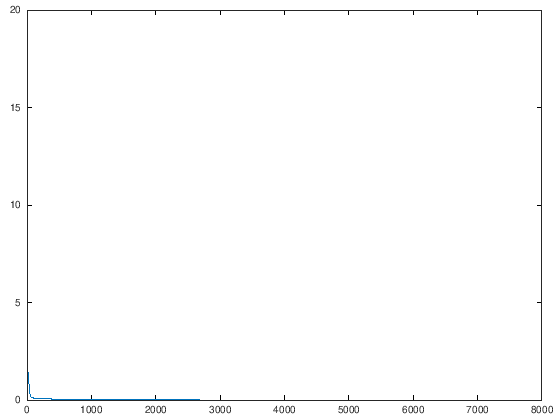

In [23]:
plot(mse_vec)

In [24]:
ans =  sum(X_train_bias'*W_bias', 2);

In [25]:
[ans, y_train, (y_train - ans)]

ans =

   -0.80764310   -0.78757625    0.02006685
   -0.80083502   -0.78757625    0.01325877
   -0.78053066   -0.78757625   -0.00704559
    0.45142412    0.45070735   -0.00071677
   -0.80764310   -0.78757625    0.02006685
   -0.76865726   -0.78757625   -0.01891900
   -0.79573202   -0.78757625    0.00815576
    1.75993215    1.68899096   -0.07094119
    1.75648940    1.68899096   -0.06749844
   -0.79431321   -0.78757625    0.00673696
   -0.79712510   -0.78757625    0.00954884
   -0.79431321   -0.78757625    0.00673696
   -0.87482595   -0.78757625    0.08724969
    0.64699914   -0.78757625   -1.43457540
   -1.56582710   -0.78757625    0.77825085
   -1.84149728   -0.78757625    1.05392102
   -0.30452742    1.68899096    1.99351838
    0.03733642   -0.78757625   -0.82491268
    1.41865330   -2.02585986   -3.44451316
    1.26563437    0.45070735   -0.81492702
    1.80791442    0.45070735   -1.35720706
   -0.50420275   -0.78757625   -0.28337351
    1.78102894   -0.78757625   -2.56860519
   -

    0.97954497    0.45070735   -0.52883762
   -4.26762592   -0.78757625    3.48004966
    0.98469082   -0.78757625   -1.77226708
    0.98469082   -0.78757625   -1.77226708
   -4.43973688   -0.78757625    3.65216063
   -0.92298295   -0.78757625    0.13540669
    2.63638564    0.45070735   -2.18567828
   -3.80485730    1.68899096    5.49384826
   -2.14409301   -2.02585986    0.11823315
    2.29404330    1.68899096   -0.60505233
   -2.29989027   -0.78757625    1.51231402
    0.91266978   -0.78757625   -1.70024603
    1.02497538   -0.78757625   -1.81255163
    0.82627591    0.45070735   -0.37556856
    1.42787437    1.68899096    0.26111659
    1.42787437    1.68899096    0.26111659
   -4.19566116   -0.78757625    3.40808491
   -1.44260313   -0.78757625    0.65502687
    2.11366266    1.68899096   -0.42467170
    1.31523020    0.45070735   -0.86452285
   -2.35027267    0.45070735    2.80098002
    0.96762835    0.45070735   -0.51692099
    0.52633373   -0.78757625   -1.31390998
   -0.28003

    2.94442138    0.45070735   -2.49371403
    2.94442138    0.45070735   -2.49371403
    0.11861773   -0.78757625   -0.90619398
    0.13089565    0.45070735    0.31981171
    0.33650906    0.45070735    0.11419830
   -0.01314626    0.45070735    0.46385362
    0.42709173    0.45070735    0.02361563
    1.68874447    1.68899096    0.00024649
   -3.49064514    2.92727457    6.41791971
    0.68011069    0.45070735   -0.22940333
    0.96057060   -0.78757625   -1.74814685
   -5.33699385   -0.78757625    4.54941760
   -0.63895170   -0.78757625   -0.14862455
    1.32969243    1.68899096    0.35929854
    2.80985348   -0.78757625   -3.59742974
   -0.94717150    0.45070735    1.39787886
   -0.94717150    0.45070735    1.39787886
   -0.75878072   -0.78757625   -0.02879553
    2.80985348   -0.78757625   -3.59742974
    3.86955287    0.45070735   -3.41884552
   -0.54204842    0.45070735    0.99275577
   -0.60236274    0.45070735    1.05307009
    1.51529132   -0.78757625   -2.30286757
    2.02392

   -1.67044680   -2.02585986   -0.35541307
   -0.00104272    0.45070735    0.45175007
    3.62297525    0.45070735   -3.17226789
    1.53331402   -2.02585986   -3.55917388
   -3.90966916   -0.78757625    3.12209291
   -3.97175211   -0.78757625    3.18417585
    2.32583614    0.45070735   -1.87512879
    0.25028652   -0.78757625   -1.03786277
    0.25028652   -0.78757625   -1.03786277
    0.19394800   -0.78757625   -0.98152425
    3.45210936    1.68899096   -1.76311839
    3.56461808    1.68899096   -1.87562712
   -0.30229030    0.45070735    0.75299765
    2.48153796    1.68899096   -0.79254700
   -4.67655561   -0.78757625    3.88897935
    2.71050858    2.92727457    0.21676600
    3.96387679    1.68899096   -2.27488583
   -1.49403921   -0.78757625    0.70646296
   -3.64423384    0.45070735    4.09494120
   -1.49403921   -0.78757625    0.70646296
   -1.09036044   -0.78757625    0.30278419
    0.03451083   -0.78757625   -0.82208708
   -0.38726183   -0.78757625   -0.40031442
    1.03427

   -0.74726751    0.45070735    1.19797486
   -0.69539067    0.45070735    1.14609803
   -1.32172167   -0.78757625    0.53414542
   -4.97854010   -0.78757625    4.19096384
   -2.53989479    0.45070735    2.99060215
   -0.60258379   -0.78757625   -0.18499246
   -2.53989479    0.45070735    2.99060215
   -6.80997526   -0.78757625    6.02239900
   -6.11324067   -0.78757625    5.32566441
   -0.39557404    0.45070735    0.84628139
   -0.42530494    0.45070735    0.87601229
   -0.71455978   -0.78757625   -0.07301647
   -2.33057078    0.45070735    2.78127813
    0.81439854    0.45070735   -0.36369119
    1.55103559   -0.78757625   -2.33861184
   -1.78101279   -0.78757625    0.99343654
    0.38233240    0.45070735    0.06837496
    0.08702690   -0.78757625   -0.87460316
   -3.59475684   -0.78757625    2.80718059
    0.08702690   -0.78757625   -0.87460316
   -2.11223181   -0.78757625    1.32465556
   -0.41937450   -0.78757625   -0.36820175
   -0.41937450   -0.78757625   -0.36820175
   -0.10760

    2.76987460   -0.78757625   -3.55745085
    2.80717867    0.45070735   -2.35647132
    0.47794636    0.45070735   -0.02723901
    2.95446614    1.68899096   -1.26547518
    1.00464430   -0.78757625   -1.79222055
    3.20673880    0.45070735   -2.75603144
    1.56252947   -0.78757625   -2.35010572
    1.78556812   -0.78757625   -2.57314438
    5.09143532    0.45070735   -4.64072797
    3.20673880    0.45070735   -2.75603144
    3.23703094    0.45070735   -2.78632359
    4.12387955    1.68899096   -2.43488859
   -3.94351317   -0.78757625    3.15593691
    4.31820983    0.45070735   -3.86750247
    1.70228690   -0.78757625   -2.48986316
    3.35750274    0.45070735   -2.90679539
    3.35750274    0.45070735   -2.90679539
    3.08322694    1.68899096   -1.39423597
    1.95797295   -0.78757625   -2.74554920
    5.98998096    1.68899096   -4.30098999
    0.92038350   -0.78757625   -1.70795976
    0.92038350   -0.78757625   -1.70795976
   -3.16536934   -0.78757625    2.37779308
    3.75754

In [26]:
y_test

y_test =

  -0.78758
   2.92727
   0.45071
   0.45071
   0.45071
  -2.02586
   1.68899
   0.45071
   0.45071
  -0.78758
   0.45071
   0.45071
  -0.78758
   1.68899
   1.68899
   1.68899
   0.45071
   0.45071
   0.45071
  -0.78758
   0.45071
   0.45071
   0.45071
   0.45071
   0.45071
  -0.78758
   0.45071
   0.45071
   1.68899
   0.45071
   0.45071
   1.68899
   0.45071
  -0.78758
   0.45071
   0.45071
  -0.78758
   1.68899
   1.68899
   0.45071
  -0.78758
   1.68899
   0.45071
   1.68899
  -0.78758
  -0.78758
  -0.78758
  -0.78758
   1.68899
   0.45071
   0.45071
   0.45071
   0.45071
   0.45071
   0.45071
   0.45071
   0.45071
  -2.02586
   1.68899
  -0.78758
   0.45071
   0.45071
  -0.78758
   0.45071
  -0.78758
  -0.78758
   0.45071
  -0.78758
   0.45071
  -0.78758
  -2.02586
   0.45071
  -0.78758
   1.68899
  -0.78758
   0.45071
   0.45071
   0.45071
   0.45071
   0.45071
   0.45071
   0.45071
   1.68899
   2.92727
  -0.78758
   1.68899
   1.68899
   1.68899
  -0.78758
   1.68899
